In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
image_raw_data=tf.gfile.FastGFile('/Users/hemingwei/Pictures/emoji/Photo Booth 图库.jpg','rb').read()
img_data=tf.image.decode_jpeg(image_raw_data)

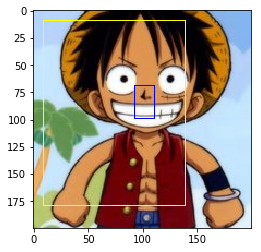

In [5]:
with tf.Session() as sess:
    img_data=tf.image.resize_images(img_data,[200,200],method=1)
    batched=tf.expand_dims(tf.image.convert_image_dtype(img_data,tf.float32),0)
    boxes=tf.constant([[[0.05,0.05,0.9,0.7],[0.35,0.47,0.5,0.56]]])
    result=tf.image.draw_bounding_boxes(batched,boxes)
    plt.imshow(result[0].eval())

Digital type:  <dtype: 'float32'>
Digital type:  <dtype: 'uint8'>
Digital type:  <dtype: 'float32'>
Digital type:  <dtype: 'float32'>


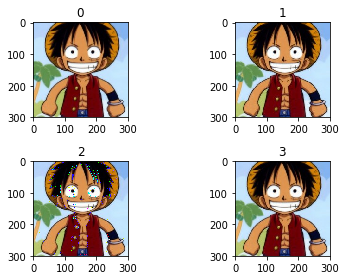

In [6]:
with tf.Session() as sess:
    for i in range(4):  
        resized=tf.image.resize_images(img_data,[300,300],method=i)
        print('Digital type: ',resized.dtype)
        cat=np.asarray(resized.eval(),dtype='uint8')
        plt.subplot(2,2,i+1)
        plt.tight_layout()
        plt.title(i)
        plt.imshow(cat)
    plt.show()

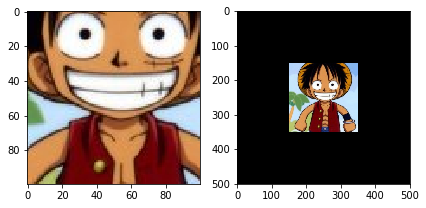

In [7]:
with tf.Session() as sess:
    croped=tf.image.resize_image_with_crop_or_pad(img_data,100,100)
    padded=tf.image.resize_image_with_crop_or_pad(img_data,500,500)
    plt.subplot(121)
    plt.imshow(croped.eval())
    plt.subplot(122)
    plt.tight_layout()
    plt.imshow(padded.eval())
    plt.show()

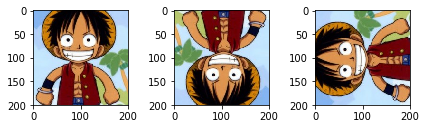

In [8]:
with tf.Session() as sess:
    flipped1=tf.image.flip_left_right(img_data)
    flipped2=tf.image.flip_up_down(img_data)
    transpose_img=tf.image.transpose_image(img_data)
    
    for i,img in enumerate([flipped1,flipped2,transpose_img]):
        plt.subplot(1,3,i+1)
        plt.tight_layout()
        plt.imshow(img.eval())
    plt.show()

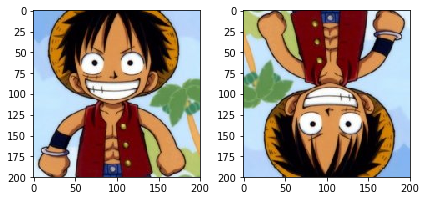

In [9]:
with tf.Session() as sess:
    flipped1=tf.image.random_flip_left_right(img_data)
    flipped2=tf.image.random_flip_up_down(img_data)
    
    for i,img in enumerate([flipped1,flipped2]):
        plt.subplot(1,2,i+1)
        plt.tight_layout()
        plt.imshow(img.eval())
    plt.show()

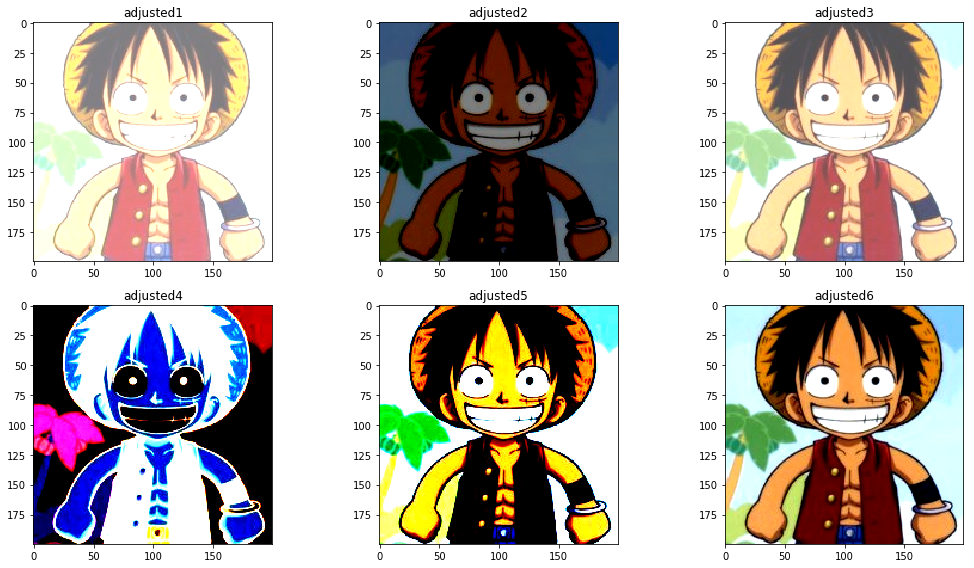

In [10]:
with tf.Session() as sess:
    adjusted1=tf.image.adjust_brightness(img_data,0.5)
    adjusted2=tf.image.adjust_brightness(img_data,-0.5)
    adjusted3=tf.image.random_brightness(img_data,max_delta=0.5)
    adjusted4=tf.image.adjust_contrast(img_data,-5)
    adjusted5=tf.image.adjust_contrast(img_data,5)
    adjusted6=tf.image.random_contrast(img_data,1, 5)
    
    plt.figure(figsize=(15,8))
    for i,img in enumerate([adjusted1,adjusted2,adjusted3,adjusted4,adjusted5,adjusted6]):
        
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(img.eval())
        plt.title('adjusted{}'.format(i+1))
    plt.show()

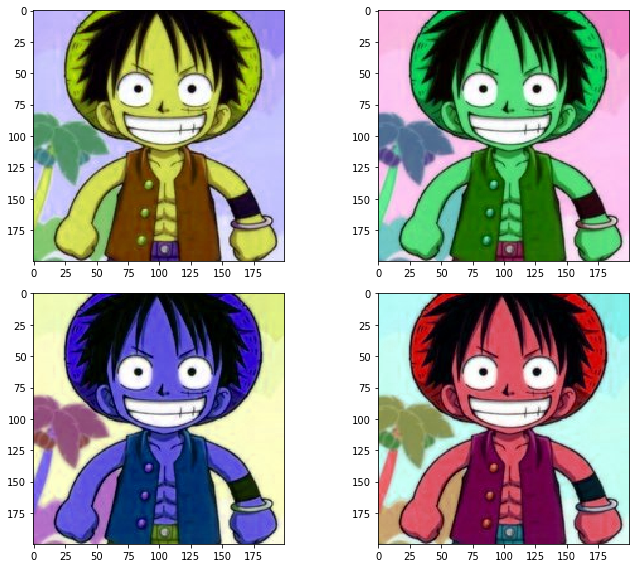

In [11]:
with tf.Session() as sess:
    adjusted1=tf.image.adjust_hue(img_data,0.1)
    adjusted2=tf.image.adjust_hue(img_data,0.3)
    adjusted3=tf.image.adjust_hue(img_data,0.6)
    adjusted4=tf.image.adjust_hue(img_data,0.9)
    
    plt.figure(figsize=(10,8))
    for i,img in enumerate([adjusted1,adjusted2,adjusted3,adjusted4]):
        plt.subplot(2,2,i+1)
        plt.tight_layout()
        plt.imshow(img.eval())
    plt.show()

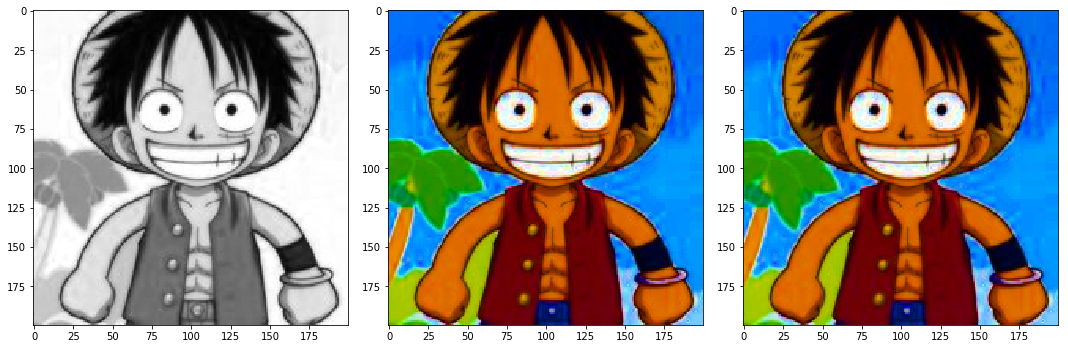

In [12]:
with tf.Session() as sess:
    adjusted1=tf.image.adjust_saturation(img_data,-5)
    adjusted2=tf.image.adjust_saturation(img_data,5)
    adjusted3=tf.image.random_saturation(img_data,1,5)
    
    plt.figure(figsize=(15,8))
    for i,img in enumerate([adjusted1,adjusted2,adjusted3]):
        plt.subplot(1,3,i+1)
        plt.tight_layout()
        plt.imshow(img.eval())
    plt.show()

[[[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


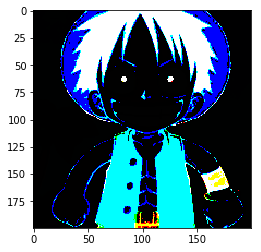

In [13]:
with tf.Session() as sess:
    adjusted=tf.image.per_image_standardization(img_data)
    print(np.uint8(adjusted.eval()))
    plt.imshow(np.uint8(adjusted.eval()))
    plt.show()

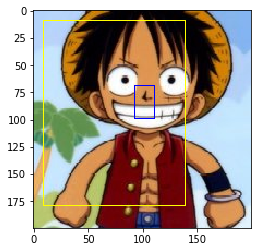

In [17]:
with tf.Session() as sess:
    img_data=tf.image.resize_images(img_data,[200,200],method=1)
    batched=tf.expand_dims(tf.image.convert_image_dtype(img_data,tf.float32),0)
    boxes=tf.constant([[[0.05,0.05,0.9,0.7],[0.35,0.47,0.5,0.56]]])
    result=tf.image.draw_bounding_boxes(batched,boxes)
    plt.imshow(result[0].eval())
    plt.show()